# Housing Prices Prediction

We will look at a housing price dataset from the Kaggle competition, having the files "train.csv" which will be used to train the model. The "data_description.txt" has the description of all features that are present for reference.

In [1]:
#import relevant libraries that will be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")
print("Here are the first five training examples printed out:")
print(data.head())
print("The dimensions of this dataset are:", data.shape)

Here are the first five training examples printed out:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  Sal

In [2]:
#Now we see that that we have 1460 training examples. Now we have to verify if there are any missing values and which features
#have them and how much.

print("Checking to see which features have missing values:\n")
for columnName, columnValue in data.iteritems():
    if(data[columnName].isnull().any()):
        print(columnName, "was found to have missing values of the amount", data[columnName].isnull().sum(), "and will thus be removed.")
        del data[columnName]
print("The number of features removed are:", data.shape)

Checking to see which features have missing values:

LotFrontage was found to have missing values of the amount 259 and will thus be removed.
Alley was found to have missing values of the amount 1369 and will thus be removed.
MasVnrType was found to have missing values of the amount 8 and will thus be removed.
MasVnrArea was found to have missing values of the amount 8 and will thus be removed.
BsmtQual was found to have missing values of the amount 37 and will thus be removed.
BsmtCond was found to have missing values of the amount 37 and will thus be removed.
BsmtExposure was found to have missing values of the amount 38 and will thus be removed.
BsmtFinType1 was found to have missing values of the amount 37 and will thus be removed.
BsmtFinType2 was found to have missing values of the amount 38 and will thus be removed.
Electrical was found to have missing values of the amount 1 and will thus be removed.
FireplaceQu was found to have missing values of the amount 690 and will thus be

In [3]:
#Now we will find out what data types are in each column so that we can move forward with the data pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [4]:
#We have 27 features that are of 'object' type, and by reference to the data description file, we know that they are string
#objects, representing cataegories that are present. We thus have to convert these categories into numerical values, so that
#they can be processed by the algorithm. What is done here is, we will traverse the entire column, and for any new key, it will
#replaced with a subsequent value, increment of the previous, starting from 1.
num_change = 0
for (columnName, columnData) in data.iteritems():
    if(data.dtypes[columnName]==object):
        num_change += 1
        count = 1
        dictionary = {}
        for i in range(1460):
            if(dictionary.get(columnData[i])==None):
                dictionary[columnData[i]] = count
                count += 1
            else: continue
        data[columnName] = data[columnName].replace(dictionary)
print("The number of changes made to the dataset:", num_change)
print("Displaying the info for all columns for sanity check: ", data.info())
print("Printing the modified dataset:\n", data.head())
del data['Id']

The number of changes made to the dataset: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   LotShape       1460 non-null   int64
 6   LandContour    1460 non-null   int64
 7   Utilities      1460 non-null   int64
 8   LotConfig      1460 non-null   int64
 9   LandSlope      1460 non-null   int64
 10  Neighborhood   1460 non-null   int64
 11  Condition1     1460 non-null   int64
 12  Condition2     1460 non-null   int64
 13  BldgType       1460 non-null   int64
 14  HouseStyle     1460 non-null   int64
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  Ye

In [5]:
#We have converted all the values and they are now in int64 format. We can now proceed with multivariate linear regression.
#We will first split the dataset into two parts, training and testing set in 80%-20% configuration.

xtrain = data[:1168]
ytrain = np.array(xtrain['SalePrice']).reshape(1168, 1)
del xtrain['SalePrice']
print("The dimensions of the training sets are:", xtrain.shape, ytrain.shape)

xtest = data[1168:]
ytest = np.array(xtest['SalePrice']).reshape(292, 1)
del xtest['SalePrice']
print("The dimensions of the training sets are:", xtest.shape, ytest.shape)

The dimensions of the training sets are: (1168, 60) (1168, 1)
The dimensions of the training sets are: (292, 60) (292, 1)


In [6]:
#However, since the features aren't scaled properly, the gradient descent algorithm will converge to the cost function minima
#very slowly. We will use mean normalisation with standard deviation division.
def normalise(X):
    i = 0
    for columnName, columnValue in X.iteritems():
        if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]
        i +=1

normalise(xtrain)
print("The amended dataset becomes:\n", xtrain.head())

C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_2268/4155204169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]


The amended dataset becomes:
    MSSubClass  MSZoning   LotArea   Street  LotShape  LandContour  Utilities  \
0    0.076049 -0.427231 -0.193993 -0.06554 -0.710215    -0.299752   -0.02926   
1   -0.865143 -0.427231 -0.086301 -0.06554 -0.710215    -0.299752   -0.02926   
2    0.076049 -0.427231  0.068213 -0.06554  1.017975    -0.299752   -0.02926   
3    0.311347 -0.427231 -0.090984 -0.06554  1.017975    -0.299752   -0.02926   
4    0.076049 -0.427231  0.350085 -0.06554  1.017975    -0.299752   -0.02926   

   LotConfig  LandSlope  Neighborhood  ...  OpenPorchSF  EnclosedPorch  \
0  -0.591594  -0.222517     -1.652382  ...     0.227290      -0.357457   
1   0.405494  -0.222517     -1.480583  ...    -0.703396      -0.357457   
2  -0.591594  -0.222517     -1.652382  ...    -0.062596      -0.357457   
3   1.402581  -0.222517     -1.308785  ...    -0.169396       4.119862   
4   0.405494  -0.222517     -1.136987  ...     0.578204      -0.357457   

   3SsnPorch  ScreenPorch  PoolArea   MiscVa

In [7]:
#We now need to append the bias column of ones for training the model.

X0train = np.ones(len(xtrain)).reshape(1168, 1)
Xtrain = np.append(X0train, xtrain, axis=1).reshape(1168, 61)

In [8]:
#Here we define the cost function [with regularization] and the gradient descent function.

def computeCost(X, y, theta, lambda1):
    theta1 = np.array(theta)
    theta1[0] = 0
    J = (1/(2*m))*((np.sum(np.square((X @ theta)-y)))+(lambda1*np.sum(np.square(theta1))))
    return J;

def gradientDescent(X, y, theta, alpha, lambda1, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta1 = np.array(theta)
        theta1[0] = 0
        theta = theta - (alpha/m)*((X.transpose() @ ((X @ theta)-y))+(lambda1*theta1))
        J_history[iter] = computeCost(X, y, theta, lambda1)
    return [theta, J_history]

In [9]:
m = 1168
lambda1 = 1
theta = np.zeros(61).reshape(61, 1)
print("Cost when the parameters are zeros:", computeCost(Xtrain, ytrain, theta, lambda1))

Cost when the parameters are zeros: 19409722053.221745


In [10]:
#Now we will train the model using the parameters shown below.

theta = np.zeros(61).reshape(61, 1)
alpha, lambda1, iterations, m = 0.002, 0.5, 2000, 1168

returned = gradientDescent(Xtrain, ytrain, theta, alpha, lambda1, iterations, m)
theta = returned[0]
J_history = returned[1]
print("The final cost value is:", computeCost(Xtrain, ytrain, theta, lambda1))

The final cost value is: 433497817.7738981


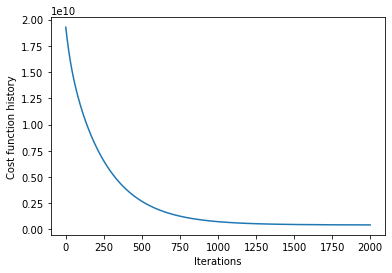

In [11]:
#We will also plot the value of the cost function after each iteration, to see the value reach a minimum and converge to a
#stabalised value.
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2000), J_history)

In [12]:
#Now we must cross-check accuracy with the test set.

X0test = np.ones(len(xtest)).reshape(292, 1)
normalise(xtest)
Xtest = np.append(X0test, xtest, axis=1).reshape(292, 61)
prediction = Xtest @ theta
print("Prediction of prices by our model:\n", prediction[:5])
print("Actual prices in the dataset:\n", ytest[:5])
std_deviation = np.std((ytest-prediction), axis=0)
print("The standard deviation of the values is:", std_deviation)
print("The root mean square error is:", np.mean(np.square(ytest-prediction))**0.5)

C:\Users\SHWETA~1\AppData\Local\Temp/ipykernel_2268/4155204169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(X.std(axis=0)[i]!=0): X[columnName] = (X[columnName]-X.mean(axis=0)[i])/X.std(axis=0)[i]


Prediction of prices by our model:
 [[200912.96075461]
 [401468.08327841]
 [137797.55703337]
 [175855.97577996]
 [160522.29711385]]
Actual prices in the dataset:
 [[235000]
 [625000]
 [171000]
 [163000]
 [171900]]
The standard deviation of the values is: [46129.83868243]
The root mean square error is: 46499.876111059995


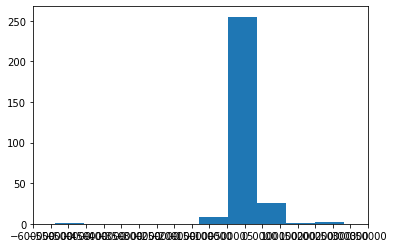

In [13]:
plt.hist(ytest-prediction)
plt.xticks(range(-600000, 400000, 50000))
plt.show()

We can clearly see that for about 250 training examples, the prediction is off within the range of -50,000 to 25,000. This is not very bad as we have used linear regression, this is the best answer we can get using this algorithm. By using multivariate polynomial regression, we can make the prediction slightly more accurate.

Another thing to realise is that many of the features many not have collinearity with the target variable [sale price] and hence, those features may confuse the model, making it more inaccurate. Checking each feature with the target variable to access whether is relevant or not needs to be done.

During the pre-processing stage, we dropped all features with NaN values, but replacing NaN values with 0 or mean of the column for any missing values below 10 could also be explored, providing us with more features. The fact that each feature of 'key' type didn't have all occurence of each key defined in the feature at least once was also ignored, because it is possible that a key that was not in the training set might occur in input data for prediction, which will throw the prediction value off the actual value.